i: 1 , avg_acc: 0.35714285714285715
i: 2 , avg_acc: 0.40674603174603174
i: 3 , avg_acc: 0.4662698412698413
i: 4 , avg_acc: 0.47619047619047616
i: 5 , avg_acc: 0.5238095238095238
i: 6 , avg_acc: 0.5615079365079365
i: 7 , avg_acc: 0.5337301587301587
i: 8 , avg_acc: 0.5555555555555556
i: 9 , avg_acc: 0.5972222222222222
i: 10 , avg_acc: 0.6091269841269841
i: 11 , avg_acc: 0.628968253968254
i: 12 , avg_acc: 0.6130952380952381
i: 13 , avg_acc: 0.626984126984127
i: 14 , avg_acc: 0.6547619047619048
i: 15 , avg_acc: 0.625
i: 16 , avg_acc: 0.6468253968253969
i: 17 , avg_acc: 0.6587301587301587
i: 18 , avg_acc: 0.6785714285714286
i: 19 , avg_acc: 0.6607142857142857
i: 20 , avg_acc: 0.6845238095238095
i: 21 , avg_acc: 0.6646825396825397
i: 22 , avg_acc: 0.6607142857142857
i: 23 , avg_acc: 0.6646825396825397
i: 24 , avg_acc: 0.6607142857142857
i: 25 , avg_acc: 0.6686507936507936


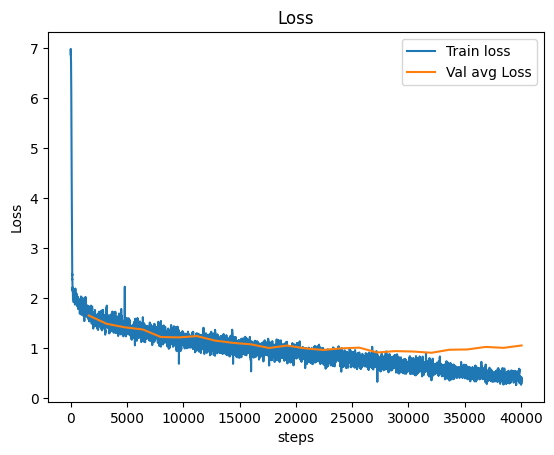

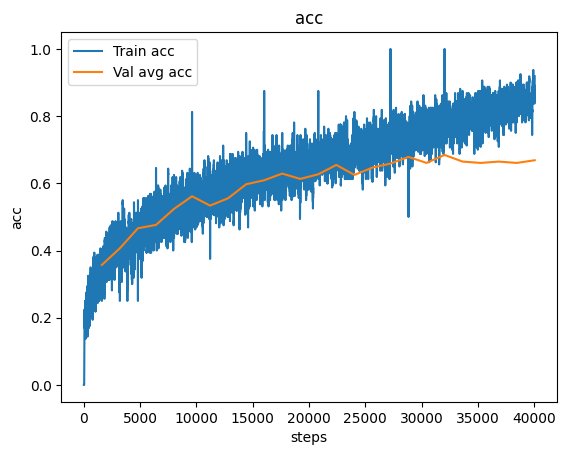

max acc: 0.6845238095238095


In [49]:
import matplotlib.pyplot as plt
import numpy as np

num_train = 1602
num_val = 63

f1 = open( './P_M_train.log')
f2 = open( './P_M_val.log')

i = 0
x = []
loss = []
error = []
bleu = []
v_i = []
v_x = []
v_loss = []
v_error = []
v_bleu = []
v_avg_x = []
v_avg_loss = []
v_avg_acc = []
v2_avg_x = []
v2_avg_loss = []
v2_avg_acc = []

for line1 in f1:
    #print( line1 )
    line1_split = line1.split(",")
    #print( line1_split[3])
    i += 1
    x.append( float(line1_split[0].split(':')[1] ) )
    loss.append( float(line1_split[1].split(':')[1]) )
    error.append( float(line1_split[2].split(':')[1]) )
    #bleu.append( float(line1_split[3].split( ' ' )[1]))
    #line1 = f1.readline()
    #line1 = line1.replace( "\n", "")

i2 = 0
for line2 in f2:
    #print( line1 )
    line2_split = line2.split(",")
    #print( line2_split)
    v_i.append( i2 )
    i2 += 1
    v_x.append( float(line2_split[0].split(':')[1] ) / num_val * num_train )
    v_loss.append( float(line2_split[1].split(':')[1]) )
    #print( line2_split[2].split(' ')[2])
    v_error.append( float(line2_split[2].split(':')[1] ) )
    #v_bleu.append( float(line2_split[3].split( ' ' )[1]))
    #line2 = f2.readline()
    #line2 = line2.replace( "\n", "")

#print( max( x ))
#print( max( v_x ) )    

for i in range( 0, len( v_x), num_val ):
    v2_avg_x.append( (i + num_val ) / num_val * num_train )
    v2_avg_loss.append( np.mean( v_loss[i:i+ num_val]))
    v2_avg_acc.append( np.mean( v_error[i:i+ num_val]))
    

moving_avg = num_val
i_max = len( v_loss )
#print( "i_max:", i_max)
for i in range( int( i_max ) ):
    i2 = i / num_val * num_train
    #i3 = i - moving_avg
    i4 = i + 1 
    #print( "i3:", i3 )
    #print( "i_max:", i_max )
    if i4 >= i_max:
        break
    v_avg_x.append( i2 )
    if i4 < moving_avg:
        #v_avg_loss.append( np.mean( v_loss[ 0:i4] ) )
        #v_avg_acc.append( np.mean( v_error[ 0:i4] ) )
        v_avg_loss.append( np.mean( float('nan') ) )
        v_avg_acc.append( np.mean( 0 ) )
    else:
        v_avg_loss.append( np.mean( v_loss[i4 - moving_avg:i4] ) )
        v_avg_acc.append( np.mean( v_error[i4 - moving_avg:i4] ) )
        

#print( v_avg_x )
#print( v_avg_loss )
#print( v_avg_acc )
for i, acc in enumerate( v2_avg_acc ):
    print( "i:", i+1, ", avg_acc:", acc )

#print( v_error )
    
plt.plot( x, loss, label="Train loss")
#plt.plot( v_x, v_loss, label="Val Loss" )
#plt.plot( v_avg_x, v_avg_loss, label="Val avg Loss")
plt.plot( v2_avg_x, v2_avg_loss, label="Val avg Loss")
plt.title( "Loss")
plt.xlabel( 'steps')
plt.ylabel( 'Loss')
plt.legend()
#plt.ylim( 0, 20 )
#plt.xlim( 116000, 130000 )
plt.show()

plt.plot( x, error, label = 'Train acc')
#plt.plot( v_x, v_error, label="Val acc")
#plt.plot( v_avg_x, v_avg_acc, label="Val avg acc" )
plt.plot( v2_avg_x, v2_avg_acc, label="Val avg acc" )
plt.title( "acc")
plt.xlabel( 'steps')
plt.ylabel( 'acc')
plt.legend()
#plt.ylim( 0.3, 1 )
#plt.xlim( 116000, 130000 )
plt.show()

#a = [float( v_avg_acc[i]) for i in range( len(v_avg_acc))]
#print( type(a))
#print( type(a[0]))
#print( a )
print( "max acc:", max(v2_avg_acc))

#plt.plot( x, error, label = 'Train WER')
#plt.plot( v_x, v_error, label="Val WER")
#plt.title( "WER")
#plt.xlabel( 'steps')
#plt.ylabel( 'WER')
#plt.legend()
#plt.ylim( 0, 1 )
#plt.xlim( 76000, 90000 )
#plt.show()


#plt.plot( x, bleu, label = 'Train BLEU')
#plt.plot( v_x, v_bleu, label="Val BLEU")
#plt.title( "BLEU")
#plt.xlabel( 'Epochs')
#plt.ylabel( 'BLEU')
#plt.legend()
#plt.ylim( 0, 20)
#plt.show()


#plt.plot( v_x, v_loss)
#plt.title( "Validation Loss")
#plt.xlabel( 'Epochs')
#plt.ylabel( 'Loss')

#plt.show()